In [1]:
import os
import pandas as pd

# dataset location
dataset_loc="C:/Users/SAMARTH/Desktop/speech_recoginition/dataset/"
dataset_dir_list = os.listdir(dataset_loc)

emotion = []
path = []
path1=[]
# final dataset location
f_dataset_loc="C:/Users/SAMARTH/Desktop/speech_recoginition/final_dataset/"


# three emotion is taken in use(i.e sad, angry, happy and other)
for audio in dataset_dir_list:
    v1=audio.split('_')
    if(v1[2]=='SAD'):
        emotion.append('sad')
        path1.append(dataset_loc+audio)
    elif(v1[2]=='ANG'):
        emotion.append('angry')
        path1.append(dataset_loc+audio)
    elif(v1[2]=='HAP'):
        emotion.append('happy')
        path1.append(dataset_loc+audio)
    else:
        emotion.append('Unknown')
    path.append(f_dataset_loc+audio)

# create dataframe which contain two rows(emotions and path)
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(path, columns=['Path'])
final_df = pd.concat([emotion_df, path_df], axis=1)
final_df.head()


,Emotions,Path
0,angry,C:/Users/SAMARTH/Desktop/speech_recoginition/f...
1,Unknown,C:/Users/SAMARTH/Desktop/speech_recoginition/f...
2,Unknown,C:/Users/SAMARTH/Desktop/speech_recoginition/f...
3,happy,C:/Users/SAMARTH/Desktop/speech_recoginition/f...
4,Unknown,C:/Users/SAMARTH/Desktop/speech_recoginition/f...


In [2]:
# number of dataset of all four emotions

final_df.Emotions.value_counts()

Unknown    3629
happy      1271
sad        1271
angry      1271
Name: Emotions, dtype: int64

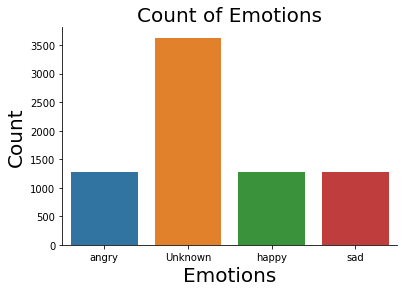

In [3]:
# bar graph representation of different dataset

import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Count of Emotions',size=20)
sns.countplot(final_df.Emotions)
plt.ylabel('Count',size=20)
plt.xlabel('Emotions',size=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [4]:
# dataset of all three emotions(happy, sad and angry) stored in final_dataset file

import shutil

loc="C:/Users/SAMARTH/Desktop/speech_recoginition/"
file="final_dataset/"
dirpath = os.path.join(loc,file)
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

os.mkdir(dirpath)

for i in path1:
    shutil.copy(i,dirpath)


In [5]:
# find average length of audio file so that we can select file which have average length.

import mutagen
from mutagen.wave import WAVE

v2=os.listdir(dirpath)
L_time=list()
count=0
sum1=0
for audio in v2:
    audio1=WAVE(dirpath+audio)
    sum1+=int(audio1.info.length)
    count+=1

average=int(sum1/count)
print(average) 
# average value: 2sec

for audio in v2:
    audio1=WAVE(dirpath+audio)
    length=int(audio1.info.length)
    if(length<average or length>average+1):
        temp=dirpath+audio
        L_time.append(temp)

        
for i in L_time:
    os.remove(i) 

2


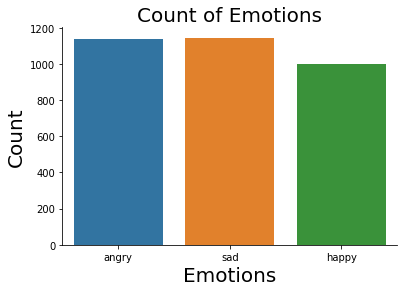

In [6]:
# bar graph representation after preprocessed dataset.

emotion1=[]
path2=[]

v4=os.listdir(dirpath)
for audio in v4:
    v3=audio.split('_')
    if(v3[2]=='SAD'):
        emotion1.append('sad')
    elif(v3[2]=='ANG'):
        emotion1.append('angry')
    elif(v3[2]=='HAP'):
        emotion1.append('happy')
    else:
        emotion1.append('Unknown')
    path2.append(dirpath+audio)


emotion_df1 = pd.DataFrame(emotion1, columns=['Emotions'])
path_df1 = pd.DataFrame(path2, columns=['Path'])
final_df1 = pd.concat([emotion_df1, path_df1], axis=1)
plt.title('Count of Emotions',size=20)
sns.countplot(final_df1.Emotions)
plt.ylabel('Count',size=20)
plt.xlabel('Emotions',size=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.rcParams.update({'font.size': 1.5})
plt.show()

In [7]:
# number of dataset after preprocessing.

final_df1.Emotions.value_counts()

sad      1145
angry    1138
happy     997
Name: Emotions, dtype: int64

In [8]:
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.rcParams.update({'font.size': 15})
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.rcParams.update({'font.size': 15})
    plt.colorbar()

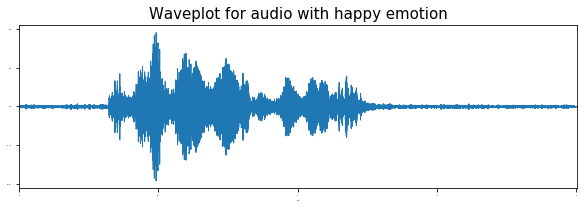

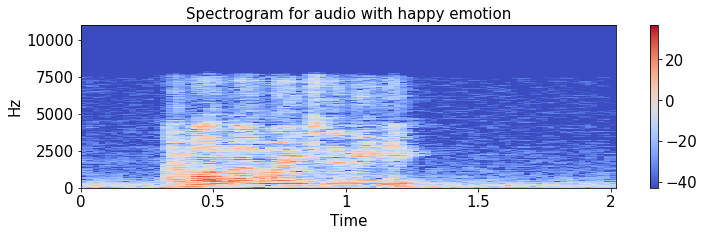

In [9]:
# waveplot and spectrogram representation of happy dataset.

emotion='happy'
path = np.array(final_df1.Path[final_df1.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

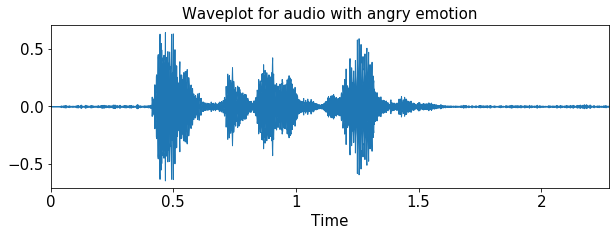

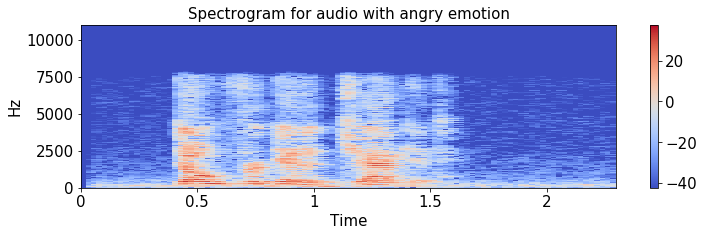

In [10]:
# waveplot and spectrogram representation of angry dataset

emotion='angry'
path = np.array(final_df1.Path[final_df1.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

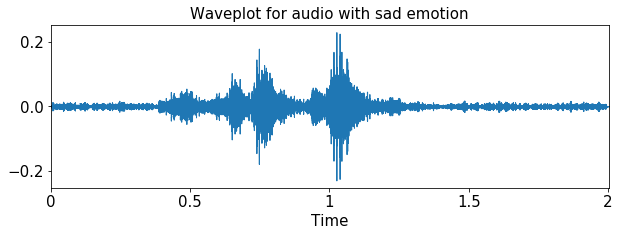

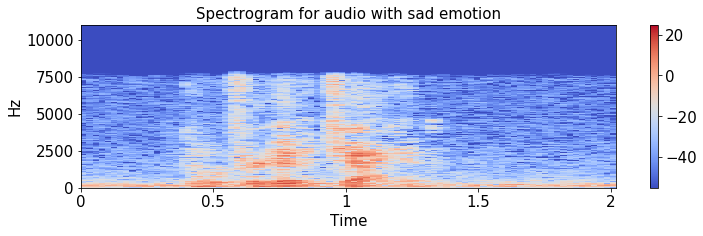

In [11]:
# waveplot and spectrogram representation of sad dataset.

emotion='sad'
path = np.array(final_df1.Path[final_df1.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
# extract features such as mfcc, chroma, mel

import pandas as pd
import numpy as np
import glob,pickle,soundfile,pickle,pitch,librosa
import os

def extract_feature(file_name, mfcc,chroma,mel,zcr,rms ):
    with soundfile.SoundFile(file_name) as sound_file:
        X= sound_file.read(dtype="float32")
        sr= sound_file.samplerate
        if chroma :
            stft=np.abs(librosa.stft(X))
        result= np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, n_mfcc=13, sr=sr).T,axis=0)
            result=np.hstack((result,mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft,  sr=sr).T,axis=0)
            result=np.hstack((result,chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X,sr=sr).T, axis=0)
            result=np.hstack((result,mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X).T,axis=0)
            result=np.hstack((result,zcr))
        if rms:
            rms=np.mean(librosa.feature.rms(y=X).T,axis=0)
            result=np.hstack((result,rms))
    return result
        

In [22]:
x,y=[],[]

emotions={
    'SAD':'Sad',
    'HAP':'Happy',
    'ANG':'Angry'
}

In [24]:
for file in glob.glob("C:/Users/SAMARTH/Desktop/speech_recoginition/final_dataset*/*.wav"):
    file_name=os.path.basename(file)
    emotion=emotions[file_name.split("_")[2]]
    features= extract_feature(file, mfcc=True,chroma=True,mel=True,zcr=False,rms=False)
    x.append(features)
    y.append(emotion)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [25]:
# convert features values and emotion into dataframe.

features_value = pd.DataFrame(x)
features_value['emotions']=y
features_value=features_value.fillna(0)
features_value.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,emotions
0,-305.513550,92.898506,8.516958,23.961588,7.464701,-5.752542,-11.893585,-9.657942,-4.007896,-13.330255,...,0.003979,0.002250,0.003137,0.003351,0.002825,0.002283,0.002875,0.003217,0.002537,Angry
1,-364.626160,97.106995,15.754377,34.189392,18.356226,-4.537027,-6.385002,-4.838215,-4.753980,-10.991578,...,0.000715,0.000688,0.000794,0.001186,0.001092,0.001149,0.001007,0.001556,0.000723,Sad
2,-359.484467,109.216240,12.352592,22.740965,6.945110,1.847854,-4.851697,-5.719258,-3.910132,-12.466139,...,0.000408,0.000675,0.000528,0.000303,0.000336,0.000480,0.000428,0.000481,0.000221,Angry
3,-333.021698,107.173714,10.303785,18.254044,0.821337,2.836935,-5.964387,-13.530436,-3.903503,-10.984605,...,0.002399,0.004279,0.003876,0.004216,0.004794,0.002896,0.005654,0.004520,0.003776,Angry
4,-373.101501,109.345772,19.572458,20.791132,12.327355,-2.259570,-4.964242,-7.975665,-6.443419,-8.743713,...,0.001410,0.001814,0.001847,0.001350,0.001927,0.002192,0.002240,0.002448,0.000874,Sad


In [26]:
X = features_value.iloc[: ,:-1].values
Y = features_value['emotions'].values

In [27]:


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [28]:
# split dataset into train and test dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True, test_size = 0.30)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2296, 153), (2296, 3), (984, 153), (984, 3))

In [29]:
# transform train and test dataset

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2296, 153), (2296, 3), (984, 153), (984, 3))

In [35]:
# use of CNN Algorithm

import tensorflow as tf
from matplotlib.pyplot import specgram
import tensorflow.keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input , Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Conv1D(64, 5,padding='same', input_shape=(153,1))) #1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv1D(128, 5,padding='same')) #2
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 5,padding='same')) #3
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 5,padding='same')) #4
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(3)) #7
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 153, 64)           384       
                                                                 
 activation_5 (Activation)   (None, 153, 64)           0         
                                                                 
 dropout_4 (Dropout)         (None, 153, 64)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 153, 128)          41088     
                                                                 
 activation_6 (Activation)   (None, 153, 128)          0         
                                                                 
 dropout_5 (Dropout)         (None, 153, 128)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 19, 128)         

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [37]:
history=model.fit(x_train, y_train, batch_size=64, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
36/36 [==============================] - 8s 149ms/step - loss: 1.0497 - accuracy: 0.3998 - val_loss: 1.0259 - val_accuracy: 0.5691
Epoch 2/300
36/36 [==============================] - 5s 127ms/step - loss: 1.0108 - accuracy: 0.5083 - val_loss: 0.9981 - val_accuracy: 0.6189
Epoch 3/300
36/36 [==============================] - 5s 127ms/step - loss: 0.9875 - accuracy: 0.5928 - val_loss: 0.9785 - val_accuracy: 0.6016
Epoch 4/300
36/36 [==============================] - 5s 127ms/step - loss: 0.9671 - accuracy: 0.6032 - val_loss: 0.9608 - val_accuracy: 0.5986
Epoch 5/300
36/36 [==============================] - 5s 128ms/step - loss: 0.9486 - accuracy: 0.6015 - val_loss: 0.9455 - val_accuracy: 0.6098
Epoch 6/300
36/36 [==============================] - 5s 126ms/step - loss: 0.9311 - accuracy: 0.6128 - val_loss: 0.9311 - val_accuracy: 0.6057
Epoch 7/300
36/36 [==============================] - 5s 130ms/step - loss: 0.9164 - accuracy: 0.6071 - val_loss: 0.9180 - val_accuracy: 0.6128

Epoch 58/300
36/36 [==============================] - 4s 123ms/step - loss: 0.6645 - accuracy: 0.7030 - val_loss: 0.7030 - val_accuracy: 0.6819
Epoch 59/300
36/36 [==============================] - 4s 121ms/step - loss: 0.6628 - accuracy: 0.7030 - val_loss: 0.7016 - val_accuracy: 0.6819
Epoch 60/300
36/36 [==============================] - 4s 121ms/step - loss: 0.6603 - accuracy: 0.7017 - val_loss: 0.7015 - val_accuracy: 0.6839
Epoch 61/300
36/36 [==============================] - 4s 122ms/step - loss: 0.6602 - accuracy: 0.6995 - val_loss: 0.7004 - val_accuracy: 0.6850
Epoch 62/300
36/36 [==============================] - 4s 121ms/step - loss: 0.6582 - accuracy: 0.7043 - val_loss: 0.6989 - val_accuracy: 0.6829
Epoch 63/300
36/36 [==============================] - 4s 121ms/step - loss: 0.6587 - accuracy: 0.7021 - val_loss: 0.6988 - val_accuracy: 0.6829
Epoch 64/300
36/36 [==============================] - 4s 120ms/step - loss: 0.6555 - accuracy: 0.7034 - val_loss: 0.6975 - val_accuracy:

Epoch 115/300
36/36 [==============================] - 4s 120ms/step - loss: 0.6107 - accuracy: 0.7274 - val_loss: 0.6661 - val_accuracy: 0.7093
Epoch 116/300
36/36 [==============================] - 4s 121ms/step - loss: 0.6118 - accuracy: 0.7313 - val_loss: 0.6688 - val_accuracy: 0.7012
Epoch 117/300
36/36 [==============================] - 4s 123ms/step - loss: 0.6081 - accuracy: 0.7291 - val_loss: 0.6652 - val_accuracy: 0.7043
Epoch 118/300
36/36 [==============================] - 4s 122ms/step - loss: 0.6078 - accuracy: 0.7326 - val_loss: 0.6671 - val_accuracy: 0.6992
Epoch 119/300
36/36 [==============================] - 4s 122ms/step - loss: 0.6095 - accuracy: 0.7256 - val_loss: 0.6654 - val_accuracy: 0.7053
Epoch 120/300
36/36 [==============================] - 4s 120ms/step - loss: 0.6084 - accuracy: 0.7300 - val_loss: 0.6656 - val_accuracy: 0.7012
Epoch 121/300
36/36 [==============================] - 4s 119ms/step - loss: 0.6082 - accuracy: 0.7304 - val_loss: 0.6641 - val_ac

36/36 [==============================] - 4s 120ms/step - loss: 0.5751 - accuracy: 0.7491 - val_loss: 0.6476 - val_accuracy: 0.7124
Epoch 172/300
36/36 [==============================] - 4s 122ms/step - loss: 0.5713 - accuracy: 0.7526 - val_loss: 0.6462 - val_accuracy: 0.7104
Epoch 173/300
36/36 [==============================] - 4s 121ms/step - loss: 0.5772 - accuracy: 0.7491 - val_loss: 0.6496 - val_accuracy: 0.7053
Epoch 174/300
36/36 [==============================] - 4s 121ms/step - loss: 0.5726 - accuracy: 0.7478 - val_loss: 0.6463 - val_accuracy: 0.7114
Epoch 175/300
36/36 [==============================] - 4s 121ms/step - loss: 0.5711 - accuracy: 0.7539 - val_loss: 0.6473 - val_accuracy: 0.7093
Epoch 176/300
36/36 [==============================] - 4s 122ms/step - loss: 0.5717 - accuracy: 0.7504 - val_loss: 0.6493 - val_accuracy: 0.7053
Epoch 177/300
36/36 [==============================] - 4s 119ms/step - loss: 0.5697 - accuracy: 0.7500 - val_loss: 0.6453 - val_accuracy: 0.7104

36/36 [==============================] - 3s 77ms/step - loss: 0.5429 - accuracy: 0.7644 - val_loss: 0.6362 - val_accuracy: 0.7175
Epoch 228/300
36/36 [==============================] - 3s 79ms/step - loss: 0.5452 - accuracy: 0.7652 - val_loss: 0.6358 - val_accuracy: 0.7104
Epoch 229/300
36/36 [==============================] - 3s 76ms/step - loss: 0.5427 - accuracy: 0.7648 - val_loss: 0.6349 - val_accuracy: 0.7134
Epoch 230/300
36/36 [==============================] - 3s 76ms/step - loss: 0.5417 - accuracy: 0.7674 - val_loss: 0.6350 - val_accuracy: 0.7134
Epoch 231/300
36/36 [==============================] - 3s 77ms/step - loss: 0.5421 - accuracy: 0.7705 - val_loss: 0.6373 - val_accuracy: 0.7114
Epoch 232/300
36/36 [==============================] - 3s 76ms/step - loss: 0.5437 - accuracy: 0.7666 - val_loss: 0.6369 - val_accuracy: 0.7093
Epoch 233/300
36/36 [==============================] - 3s 75ms/step - loss: 0.5405 - accuracy: 0.7731 - val_loss: 0.6342 - val_accuracy: 0.7134
Epoch 

Epoch 284/300
36/36 [==============================] - 4s 122ms/step - loss: 0.5089 - accuracy: 0.7822 - val_loss: 0.6256 - val_accuracy: 0.7215
Epoch 285/300
36/36 [==============================] - 4s 121ms/step - loss: 0.5097 - accuracy: 0.7840 - val_loss: 0.6275 - val_accuracy: 0.7185
Epoch 286/300
36/36 [==============================] - 4s 123ms/step - loss: 0.5134 - accuracy: 0.7801 - val_loss: 0.6267 - val_accuracy: 0.7195
Epoch 287/300
36/36 [==============================] - 4s 121ms/step - loss: 0.5131 - accuracy: 0.7822 - val_loss: 0.6264 - val_accuracy: 0.7195
Epoch 288/300
36/36 [==============================] - 4s 121ms/step - loss: 0.5100 - accuracy: 0.7835 - val_loss: 0.6293 - val_accuracy: 0.7205
Epoch 289/300
36/36 [==============================] - 4s 122ms/step - loss: 0.5137 - accuracy: 0.7848 - val_loss: 0.6272 - val_accuracy: 0.7165
Epoch 290/300
36/36 [==============================] - 4s 121ms/step - loss: 0.5070 - accuracy: 0.7809 - val_loss: 0.6260 - val_ac

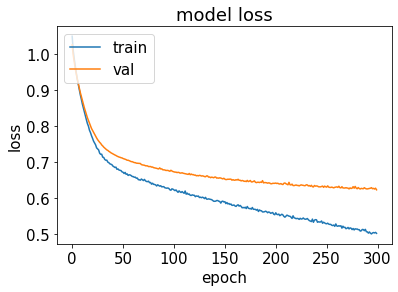

In [38]:
# comparision graph of loss vs epoch between train dataset and validating

import matplotlib.pyplot as plt
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.rcParams.update({'font.size': 10})
plt.show()

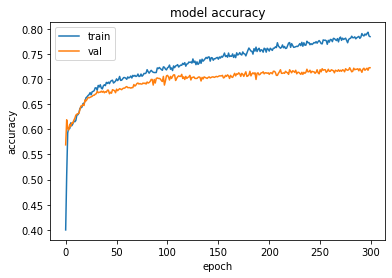

In [39]:
# comparision graph of accuracy vs epoch between train dataset and validating

metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.rcParams.update({'font.size': 10})
plt.show()

In [40]:
if os.path.isfile('C:/Users/SAMARTH/Desktop/speech_recoginition/cnn_model.h5') is False:
    model.save('C:/Users/SAMARTH/Desktop/speech_recoginition/cnn_model.h5')

In [41]:
from keras.models import load_model
model_new = load_model('C:/Users/SAMARTH/Desktop/speech_recoginition/cnn_model.h5')

In [42]:
# test accuracy
loss,accuracy=model.evaluate(x_test,y_test,verbose=2)

31/31 - 1s - loss: 0.6234 - accuracy: 0.7226 - 689ms/epoch - 22ms/step


Text(0.5, 0, 'loss')

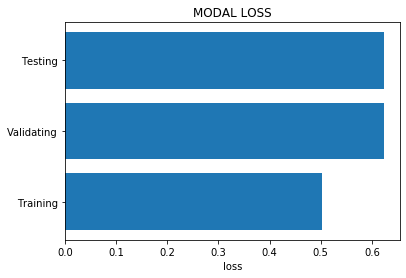

In [43]:
# bar graph of testing, validating and training vs loss

metrics['val_loss'][-1]
y=['Training','Validating','Testing']
x=[metrics['loss'][-1],metrics['val_loss'][-1],loss]
plt.barh(y,x)
plt.title("MODAL LOSS")
plt.xlabel("loss")

Text(0.5, 0, 'accuracy')

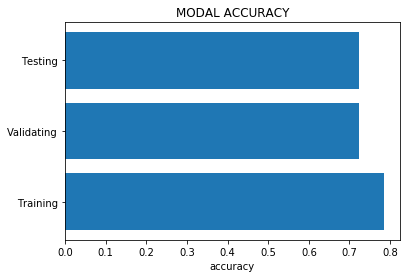

In [44]:
# bar graph of testing, validating and training vs accuracy

metrics['val_loss'][-1]
y=['Training','Validating','Testing']
x=[metrics['accuracy'][-1],metrics['val_accuracy'][-1],accuracy]
plt.barh(y,x)
plt.title("MODAL ACCURACY")
plt.xlabel("accuracy")

Text(0.5, 43.5, 'Predicted emotion')

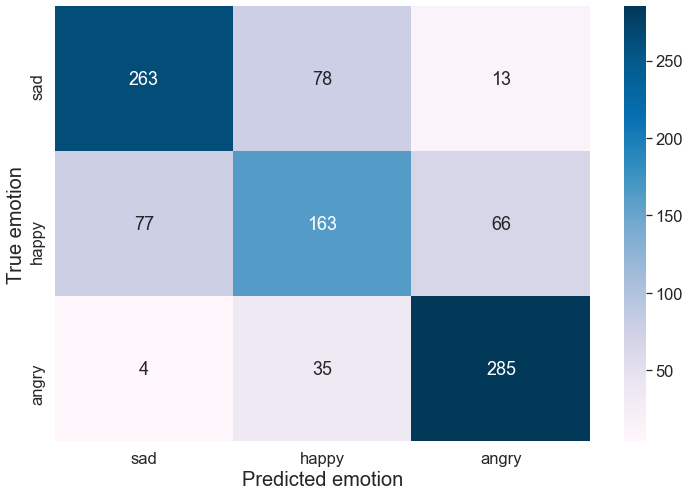

In [45]:
# confusion matrix between true emotion vs predicted emotion

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

f1=np.argmax(y_test,axis=1)
predicted=model.predict(x_test)
f2=np.argmax(predicted,axis=1)
f3=confusion_matrix(f1,f2)
index = ['sad','happy','angry']  
columns = ['sad','happy', 'angry']  
sns.set(font_scale=1.5)
cm_df = pd.DataFrame(f3,index,columns)                      
plt.figure(figsize=(12,8))
ax = plt.axes()
sns.heatmap(cm_df, ax = ax, cmap = 'PuBu', fmt="d", annot=True)
ax.set_ylabel('True emotion',size=20)
ax.set_xlabel('Predicted emotion',size=20)

In [46]:
import tensorflow.keras as keras
Cnn_loadModel = keras.models.load_model('C:/Users/SAMARTH/Desktop/speech_recoginition/cnn_model.h5')

In [50]:
feature=extract_feature("C:/Users/SAMARTH/Desktop/speech_recoginition/validation/1089_IOM_SAD_XX.wav", mfcc=True,chroma=True,mel=True,zcr=False,rms=False)

feature1= feature.reshape(1,-1)
feature3= np.expand_dims(feature1, axis=2)
emotions= ["Angry","happy","sad"]
p = Cnn_loadModel.predict(feature3)
print(p)
emotions[np.argmax(p)]

[[3.8571362e-17 2.9348262e-31 1.0000000e+00]]


'sad'